In [4]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
tips = sb.load_dataset("tips")
print(tips.day.value_counts().index)
tips.head(2)

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
irisdf = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])
irisdf.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import mglearn

In [9]:
X_data = irisdf.iloc[:,:4]; Y_data = irisdf['target']
X, x_t,Y, y_t = train_test_split(X_data,Y_data,test_size = .3, random_state = 3)

In [10]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X.values,Y.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
print(classification_report(y_t.values,knn_clf.predict(x_t.values)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      0.86      0.92        14
         2.0       0.88      1.00      0.93        14

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



(150,)
(150,)


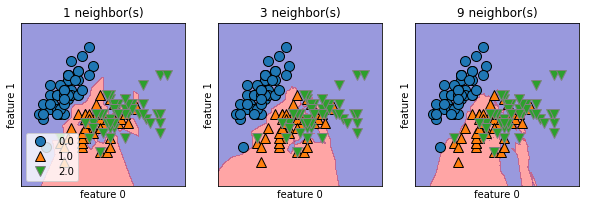

In [18]:
print(X_data.values[:,0].shape)
print(Y_data.values.shape)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_data[['sepal length (cm)','sepal width (cm)']], Y_data)
    mglearn.plots.plot_2d_separator(clf, X_data[['sepal length (cm)','sepal width (cm)']].values, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X_data.iloc[:, 0], X_data.values[:,1] , Y_data.values, ax=ax)          # Both iloc[:,0] or .value[:,1] works (the same)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)